In [135]:
import tweepy
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to /Users/charliez/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Social Media Analytics on Trump and Biden's Twitter
## -- by Charlie Chengrui Zheng 11/09/2020
In the recent presidential election, [Joe Biden](https://twitter.com/JoeBiden) just defeated [Donald Trump](https://twitter.com/realDonaldTrump) and became the next president of the United States. I am very interested the statistics of their use of social media, especially Twitter. Therefore, I analyzed the data of their recent tweets by scraping their recent tweets, investigating people's responses and inspecting the contents of their tweets. Here is the detailed walkthrough of how this social media analytics was conducted.

## Twitter Scraping
First, we need to scrape their tweets on Twitter. Because Twitter disallows web scrapers, you need apply to be a [Twitter developer](https://developer.twitter.com/en) and get consumer key, consumer secret, access token and access token secret to be able to access the data of their twitter account. We will be using [Tweepy](https://www.tweepy.org/) to access the Twitter API.

In [3]:
consumer_key = "I cannot show my key and secret"
consumer_secret = "but to make this snippet of code work"
access_token = "you can apply to be a twitter developer"
access_token_secret = "you will have your own key and secret"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

Next, we can use the API we just built to query the Twitter library and scrape their tweets. We will be getting first 50 tweets according to the time line, by the time I wrote this article (The day after Biden declared his victory). Especially, we will be collecting the time stamp, the text of the tweet, the number of retweets and the number of likes of each tweet, among all the [attributes of a tweet](https://www.geeksforgeeks.org/python-status-object-in-tweepy/). Then, we store the tweets into dataframes. 

In [5]:
# The name of their Twitter accounts
trump = "realDonaldTrump"
biden = "JoeBiden"

# To get 50 tweets
count = 50
 
# Creation of query method using parameters
biden_tweets = tweepy.Cursor(api.user_timeline,id=biden).items(count)
trump_tweets = tweepy.Cursor(api.user_timeline,id=trump).items(count)

# Pulling information from tweets iterable object
biden_tweets_list = [[tweet.created_at, tweet.text, tweet.retweet_count, tweet.favorite_count] 
                     for tweet in biden_tweets]
trump_tweets_list = [[tweet.created_at, tweet.text, tweet.retweet_count, tweet.favorite_count] 
                     for tweet in trump_tweets]

# Creation of dataframe from tweets list
tweets_biden = pd.DataFrame(biden_tweets_list, columns = ["time stamp", "tweet", "retweets","favorites"])
tweets_trump = pd.DataFrame(trump_tweets_list, columns = ["time stamp", "tweet", "retweets","favorites"])

Here is a small snippet of the first 10 tweets of biden's dataframe to showcase what we just scraped.

In [7]:
tweets_biden.head(10)

,time stamp,tweet,retweets,favorites
0,2020-11-08 14:28:23,RT @Transition46: We stand together as one Ame...,15841,0
1,2020-11-08 02:20:00,From the bottom of my heart: thank you. https:...,73176,698724
2,2020-11-08 02:10:00,A nation united.\n\nA nation strengthened.\n\n...,66984,881406
3,2020-11-08 02:08:00,"With full hearts and steady hands, with faith ...",40663,607572
4,2020-11-08 02:05:00,"Tonight, the whole world is watching America. ...",23096,335244
5,2020-11-08 02:02:00,Especially for those moments when this campaig...,35591,469339
6,2020-11-08 01:59:00,I believe that this is part of the mandate fro...,8035,140258
7,2020-11-08 01:56:00,Now that the campaign is over—what is the peop...,16375,240432
8,2020-11-08 01:53:00,"We cannot repair the economy, restore our vita...",20030,284120
9,2020-11-08 01:51:00,The Bible tells us that to everything there is...,36932,353445


## Analysis on Biden and Trump's tweets
### Frequency
Let us see when the first and 50th tweets of Biden and Trump were sent

In [30]:
print(f'Biden: the first tweet was sent on {tweets_biden.loc[0]["time stamp"]}. \nthe 50th tweet was sent on {tweets_biden.loc[49]["time stamp"]}.\nIt took {tweets_biden.loc[0]["time stamp"]-tweets_biden.loc[49]["time stamp"]} for Biden to send 50 tweets.')

Biden: the first tweet was sent on 2020-11-08 14:28:23. 
the 50th tweet was sent on 2020-11-04 19:10:00.
It took 3 days 19:18:23 for Biden to send 50 tweets.


In [31]:
print(f'Trump: the first tweet was sent on {tweets_trump.loc[0]["time stamp"]}. \nthe 50th tweet was sent on {tweets_trump.loc[49]["time stamp"]}.\nIt took {tweets_trump.loc[0]["time stamp"]-tweets_trump.loc[49]["time stamp"]} for Trump to send 50 tweets.')

Trump: the first tweet was sent on 2020-11-09 04:54:16. 
the 50th tweet was sent on 2020-11-06 16:37:01.
It took 2 days 12:17:15 for Trump to send 50 tweets.


Let us see how often they tweeted.

In [52]:
print(f'According to the recent data, Trump will send a tweet every {int(((tweets_trump.loc[0]["time stamp"]-tweets_trump.loc[49]["time stamp"]).total_seconds()/50)%60)} minutes')

According to the recent data, Trump will send a tweet every 20 minutes


In [59]:
print(f'According to the recent data, Biden will send a tweet every {int(((tweets_biden.loc[0]["time stamp"]-tweets_biden.loc[49]["time stamp"]).total_seconds()/50)%60)} minutes')

According to the recent data, Biden will send a tweet every 34 minutes


According to statistics above, we can see that both 2 politicians were active on Twitter. They both tweeted at a staggering frequency but Trump is a even more active Twitter user.
### Reweets and Favorites
We can visualize and compare the 2 presidents' numbers of retweets and favorites of each tweet, to observe how welcomed they are on Twitter.

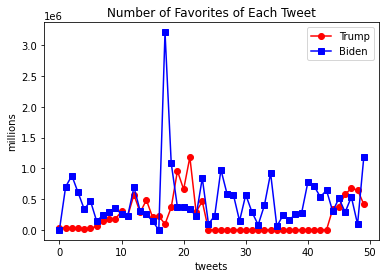

In [92]:
plt.plot(tweets_trump.index, tweets_trump.favorites, c='r', marker='o', label='Trump')
plt.plot(tweets_biden.index, tweets_biden.favorites, c='b', marker='s', label='Biden')
plt.legend(loc='upper right')
plt.title('Number of Favorites of Each Tweet')
plt.xlabel('tweets')
plt.ylabel('millions')
plt.show()

In [98]:
    print(f'Biden has {sum(tweets_biden.favorites)} favorites in total and {int(sum(tweets_biden.favorites)/50)} favorites per tweet. \nTrump has {sum(tweets_trump.favorites)} favorites in total and {int(sum(tweets_trump.favorites)/50)} favorites per tweet.')

Biden has 23764008 favorites in total and 475280 favorites per tweet. 
Trump has 10064734 favorites in total and 201294 favorites per tweet.


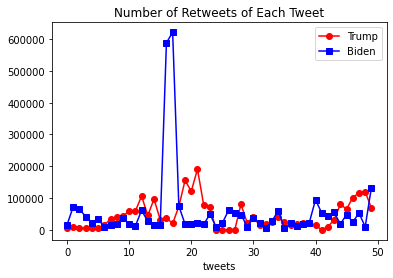

In [128]:
plt.plot(tweets_trump.index, tweets_trump.retweets, c='r', marker='o', label='Trump')
plt.plot(tweets_biden.index, tweets_biden.retweets, c='b', marker='s', label='Biden')
plt.legend(loc='upper right')
plt.title('Number of Retweets of Each Tweet')
plt.xlabel('tweets')
plt.show()

In [100]:
print(f'Biden has {sum(tweets_biden.retweets)} retweets in total and {int(sum(tweets_biden.retweets)/50)} retweets per tweet. \nTrump has {sum(tweets_trump.retweets)} retweets in total and {int(sum(tweets_trump.retweets)/50)} retweets per tweet.')

Biden has 2874090 retweets in total and 57481 retweets per tweet. 
Trump has 2275648 retweets in total and 45512 retweets per tweet.


The graphs show that Biden gained more favorites and retweets than Trump. On average, Biden has a little more retweets than Trump, and more than twice favorites than Trump. Biden is more popular than Trump on Twitter
### Word Cloud
We will investigate the contents of the text of the 2 presidents' tweets. First, we will build a corpus for each president. The corpus contains every word in their tweets' text. We will first need to tokenize every tweets, and store them into the corpus and generate the visualized word cloud by using the function below. The word clouds will display the frequently mentioned words in their tweets. The bigger the word is, the more frequent the word is used

In [136]:
def words(df):
    corpus = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the tweets
    for text in df.tweet: 

        # remove url links in tweets
        text = result = re.sub(r"http\S+", "", str(text))
        # split the value 
        tokens = [word.lower() for word in word_tokenize(text)]
        # adding the tokenized words into corpus
        corpus += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color = "white", 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(corpus) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

Let us look at the word cloud of Trump's tweets

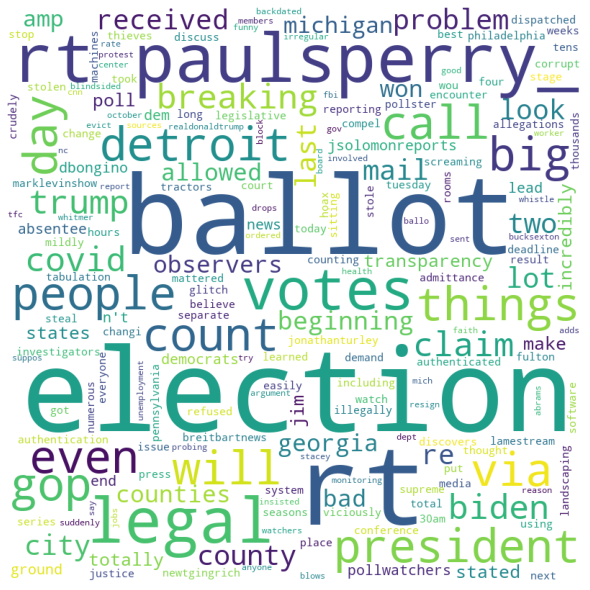

In [137]:
words(tweets_trump)

Let us look at the word cloud of Biden's tweets

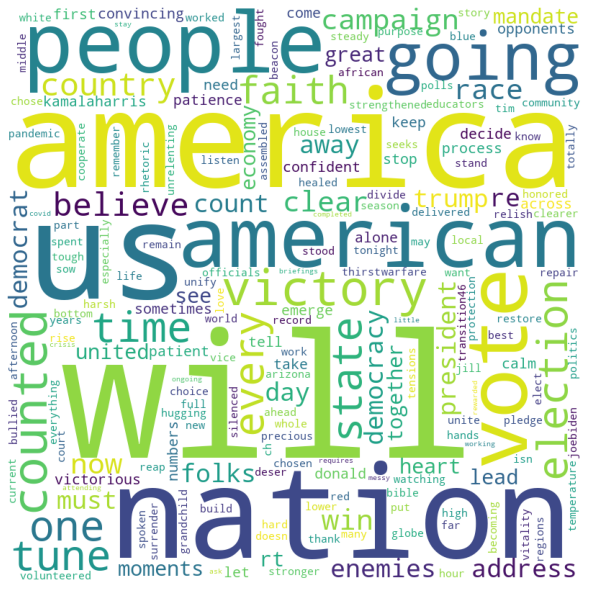

In [138]:
words(tweets_biden)

## Conclusion
From the analysis above, the statistics shows that, though Trump is more active on Twitter than Biden, Biden is more welcomed and more popular than Trump. The word clouds show that Trump cares more about the election by frequently mentioning "election" and "ballot", but Biden cares more about the country by frequently mentioning "nation", "us" and "America".